<h1 style='color:purple' align='center'>Data Science Project: Predicting Petrol Prices</h1>

Dataset is downloaded from here: https://www.kaggle.com/c/petrol-price-forecasting/data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df1 = pd.read_csv("train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [3]:
df1.tail()

,Date,Petrol (USD)
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61
812,12/31/2018,120.18


In [4]:
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [5]:
df2 = df1.dropna()

In [6]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

C:\Users\shrey\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


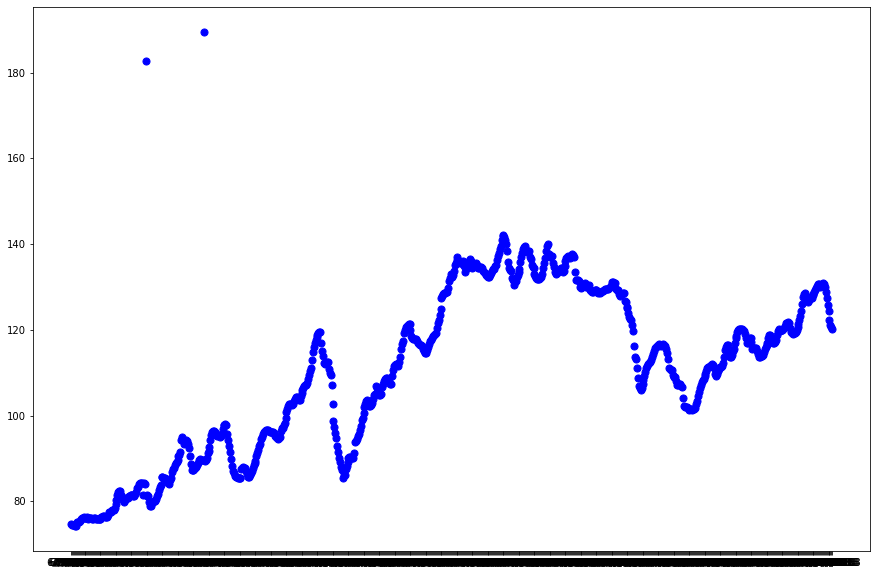

In [7]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.scatter(df2.Date, df2.Petrol,color='blue',label='Prices', s=50)

**The visualization gives us an idea of the outliers. Now removing them in the next step**

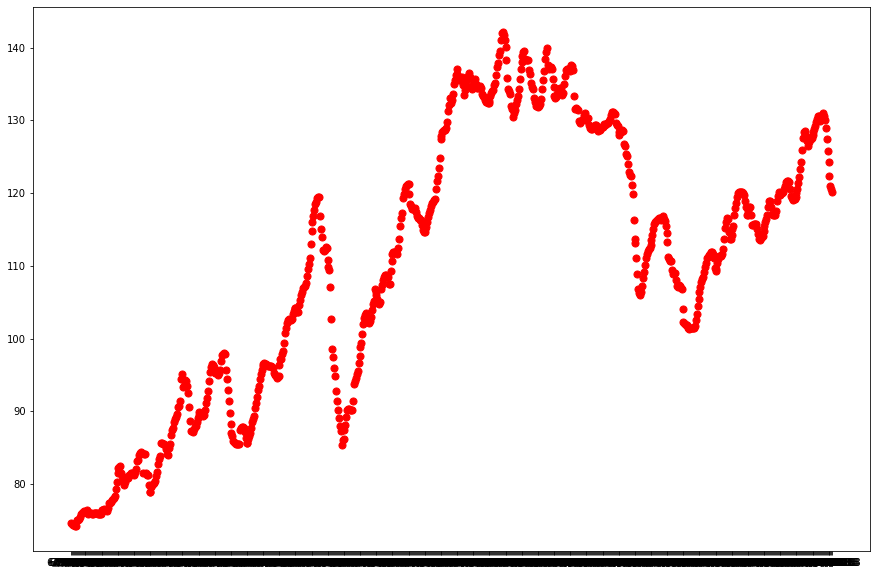

In [8]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol,color='red',label='Prices', s=50)

In [9]:
df_test=pd.read_csv("test_data.csv")
df_test

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN
5,1/6/2019,NaN
6,1/7/2019,NaN
7,1/8/2019,NaN
8,1/9/2019,NaN
9,1/10/2019,NaN


**Finding best model using GridSearchCV**

**Using LSTM**

In [10]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [12]:
training_size=int(len(df4)*0.85)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [13]:
test_data

array([[0.54090642],
       [0.54590936],
       [0.54561507],
       [0.54664509],
       [0.5509123 ],
       [0.56121248],
       [0.58137139],
       [0.60314891],
       [0.61521483],
       [0.62316068],
       [0.62227781],
       [0.59593879],
       [0.58137139],
       [0.58048852],
       [0.58887581],
       [0.600206  ],
       [0.60682755],
       [0.62963508],
       [0.64405533],
       [0.65361978],
       [0.66539141],
       [0.67392584],
       [0.67642731],
       [0.67598587],
       [0.6767216 ],
       [0.67554444],
       [0.67407298],
       [0.67083579],
       [0.65832843],
       [0.64479105],
       [0.62860506],
       [0.62992937],
       [0.63758093],
       [0.6465568 ],
       [0.64552678],
       [0.63051795],
       [0.60903473],
       [0.61006474],
       [0.61183049],
       [0.61227192],
       [0.61035903],
       [0.60197175],
       [0.59181872],
       [0.58166569],
       [0.57931136],
       [0.58387287],
       [0.58534432],
       [0.587

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

**convert an array of values into a dataset matrix**

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(586, 100)
(586,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
X_train

array([[[0.00559152],
        [0.00382578],
        [0.00309005],
        ...,
        [0.16627428],
        [0.16524426],
        [0.1640671 ]],

       [[0.00382578],
        [0.00309005],
        [0.00206004],
        ...,
        [0.16524426],
        [0.1640671 ],
        [0.16274279]],

       [[0.00309005],
        [0.00206004],
        [0.00103002],
        ...,
        [0.1640671 ],
        [0.16274279],
        [0.15538552]],

       ...,

       [[0.79649794],
        [0.79782225],
        [0.80061801],
        ...,
        [0.55488523],
        [0.55150088],
        [0.54208358]],

       [[0.79782225],
        [0.80061801],
        [0.80017657],
        ...,
        [0.55150088],
        [0.54208358],
        [0.52295468]],

       [[0.80061801],
        [0.80017657],
        [0.77354326],
        ...,
        [0.54208358],
        [0.52295468],
        [0.51603885]]])

In [79]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [80]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 2s 180ms/step - loss: 0.1418 - val_loss: 0.0035
Epoch 2/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0236 - val_loss: 0.0152
Epoch 3/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0135 - val_loss: 0.0035
Epoch 4/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0095 - val_loss: 0.0050
Epoch 5/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0078 - val_loss: 0.0044
Epoch 6/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0071 - val_loss: 0.0037
Epoch 7/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0069 - val_loss: 0.0039
Epoch 8/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 9/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0066 - val_loss: 0.0035
Epoch 10/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0057 - val_loss: 0.003

In [81]:
model.save('lstm_model.h5')

In [82]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [83]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [84]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

114.63391585585603

In [85]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

128.38444071154805

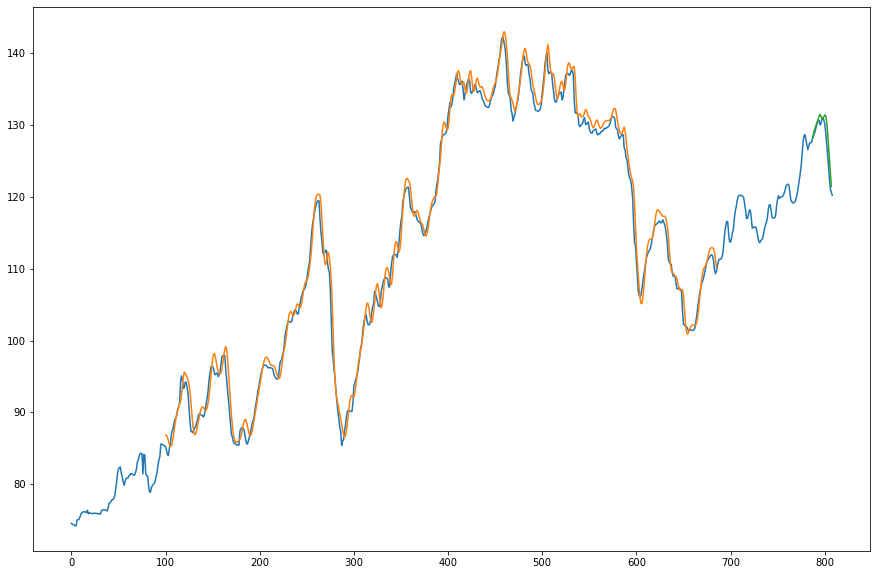

In [86]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [87]:
len(test_data)

122

In [88]:
x_input=test_data[22:].reshape(1,-1)
x_input.shape

(1, 100)

In [89]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [90]:
# demonstrate prediction for next 400 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<400):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6725313]
101
1 day input [0.67598587 0.6767216  0.67554444 0.67407298 0.67083579 0.65832843
 0.64479105 0.62860506 0.62992937 0.63758093 0.6465568  0.64552678
 0.63051795 0.60903473 0.61006474 0.61183049 0.61227192 0.61035903
 0.60197175 0.59181872 0.58166569 0.57931136 0.58387287 0.58534432
 0.58784579 0.59696881 0.60800471 0.61550912 0.62080636 0.62889935
 0.64640965 0.65685697 0.65715127 0.64626251 0.63198941 0.62978222
 0.63022366 0.63051795 0.63802237 0.65773985 0.6689229  0.67569158
 0.67010006 0.67245438 0.6734844  0.67377869 0.67657446 0.68143025
 0.68790465 0.6958505  0.69864626 0.69923484 0.69702766 0.68143025
 0.66715715 0.66333137 0.66068275 0.66156563 0.6624485  0.66539141
 0.67319011 0.68201883 0.69496763 0.70644497 0.72189523 0.7373455
 0.7610359  0.78531489 0.79782225 0.80047087 0.79031783 0.77942908
 0.77001177 0.77633902 0.78369629 0.78413773 0.78472631 0.79178929
 0.79723367 0.80311948 0.80885815 0.81739258 0.82445556 0.82960565
 0.82960565 0.82062978 0.82313125 0

14 day output [[0.8187222]]
15 day input [0.61006474 0.61183049 0.61227192 0.61035903 0.60197175 0.59181872
 0.58166569 0.57931136 0.58387287 0.58534432 0.58784579 0.59696881
 0.60800471 0.61550912 0.62080636 0.62889935 0.64640965 0.65685697
 0.65715127 0.64626251 0.63198941 0.62978222 0.63022366 0.63051795
 0.63802237 0.65773985 0.6689229  0.67569158 0.67010006 0.67245438
 0.6734844  0.67377869 0.67657446 0.68143025 0.68790465 0.6958505
 0.69864626 0.69923484 0.69702766 0.68143025 0.66715715 0.66333137
 0.66068275 0.66156563 0.6624485  0.66539141 0.67319011 0.68201883
 0.69496763 0.70644497 0.72189523 0.7373455  0.7610359  0.78531489
 0.79782225 0.80047087 0.79031783 0.77942908 0.77001177 0.77633902
 0.78369629 0.78413773 0.78472631 0.79178929 0.79723367 0.80311948
 0.80885815 0.81739258 0.82445556 0.82960565 0.82960565 0.82062978
 0.82313125 0.83284285 0.83534432 0.83034138 0.82254267 0.80532666
 0.78266627 0.75868158 0.73705121 0.70865215 0.68878752 0.68275456
 0.67642731 0.67253131

27 day output [[0.9465596]]
28 day input [0.61550912 0.62080636 0.62889935 0.64640965 0.65685697 0.65715127
 0.64626251 0.63198941 0.62978222 0.63022366 0.63051795 0.63802237
 0.65773985 0.6689229  0.67569158 0.67010006 0.67245438 0.6734844
 0.67377869 0.67657446 0.68143025 0.68790465 0.6958505  0.69864626
 0.69923484 0.69702766 0.68143025 0.66715715 0.66333137 0.66068275
 0.66156563 0.6624485  0.66539141 0.67319011 0.68201883 0.69496763
 0.70644497 0.72189523 0.7373455  0.7610359  0.78531489 0.79782225
 0.80047087 0.79031783 0.77942908 0.77001177 0.77633902 0.78369629
 0.78413773 0.78472631 0.79178929 0.79723367 0.80311948 0.80885815
 0.81739258 0.82445556 0.82960565 0.82960565 0.82062978 0.82313125
 0.83284285 0.83534432 0.83034138 0.82254267 0.80532666 0.78266627
 0.75868158 0.73705121 0.70865215 0.68878752 0.68275456 0.67642731
 0.67253131 0.67361236 0.678666   0.68622661 0.6955567  0.70615721
 0.71762037 0.72962588 0.7419517  0.75446719 0.76711202 0.77986813
 0.79273248 0.80569488

41 day output [[1.0003964]]
42 day input [0.67569158 0.67010006 0.67245438 0.6734844  0.67377869 0.67657446
 0.68143025 0.68790465 0.6958505  0.69864626 0.69923484 0.69702766
 0.68143025 0.66715715 0.66333137 0.66068275 0.66156563 0.6624485
 0.66539141 0.67319011 0.68201883 0.69496763 0.70644497 0.72189523
 0.7373455  0.7610359  0.78531489 0.79782225 0.80047087 0.79031783
 0.77942908 0.77001177 0.77633902 0.78369629 0.78413773 0.78472631
 0.79178929 0.79723367 0.80311948 0.80885815 0.81739258 0.82445556
 0.82960565 0.82960565 0.82062978 0.82313125 0.83284285 0.83534432
 0.83034138 0.82254267 0.80532666 0.78266627 0.75868158 0.73705121
 0.70865215 0.68878752 0.68275456 0.67642731 0.67253131 0.67361236
 0.678666   0.68622661 0.6955567  0.70615721 0.71762037 0.72962588
 0.7419517  0.75446719 0.76711202 0.77986813 0.79273248 0.80569488
 0.81872219 0.83174843 0.84467351 0.8573696  0.86968857 0.88147938
 0.89259934 0.90293002 0.91238761 0.92093033 0.92855954 0.93531793
 0.94128352 0.94655961

54 day output [[1.0523732]]
55 day input [0.66715715 0.66333137 0.66068275 0.66156563 0.6624485  0.66539141
 0.67319011 0.68201883 0.69496763 0.70644497 0.72189523 0.7373455
 0.7610359  0.78531489 0.79782225 0.80047087 0.79031783 0.77942908
 0.77001177 0.77633902 0.78369629 0.78413773 0.78472631 0.79178929
 0.79723367 0.80311948 0.80885815 0.81739258 0.82445556 0.82960565
 0.82960565 0.82062978 0.82313125 0.83284285 0.83534432 0.83034138
 0.82254267 0.80532666 0.78266627 0.75868158 0.73705121 0.70865215
 0.68878752 0.68275456 0.67642731 0.67253131 0.67361236 0.678666
 0.68622661 0.6955567  0.70615721 0.71762037 0.72962588 0.7419517
 0.75446719 0.76711202 0.77986813 0.79273248 0.80569488 0.81872219
 0.83174843 0.84467351 0.8573696  0.86968857 0.88147938 0.89259934
 0.90293002 0.91238761 0.92093033 0.92855954 0.93531793 0.94128352
 0.94655961 0.95126516 0.9555245  0.95945835 0.96317559 0.96676934
 0.97031367 0.97386372 0.97745633 0.981112   0.98484027 0.9886409
 0.9925065  0.99642879 1.0

66 day output [[1.0922779]]
67 day input [0.7610359  0.78531489 0.79782225 0.80047087 0.79031783 0.77942908
 0.77001177 0.77633902 0.78369629 0.78413773 0.78472631 0.79178929
 0.79723367 0.80311948 0.80885815 0.81739258 0.82445556 0.82960565
 0.82960565 0.82062978 0.82313125 0.83284285 0.83534432 0.83034138
 0.82254267 0.80532666 0.78266627 0.75868158 0.73705121 0.70865215
 0.68878752 0.68275456 0.67642731 0.67253131 0.67361236 0.678666
 0.68622661 0.6955567  0.70615721 0.71762037 0.72962588 0.7419517
 0.75446719 0.76711202 0.77986813 0.79273248 0.80569488 0.81872219
 0.83174843 0.84467351 0.8573696  0.86968857 0.88147938 0.89259934
 0.90293002 0.91238761 0.92093033 0.92855954 0.93531793 0.94128352
 0.94655961 0.95126516 0.9555245  0.95945835 0.96317559 0.96676934
 0.97031367 0.97386372 0.97745633 0.981112   0.98484027 0.9886409
 0.9925065  0.99642879 1.00039637 1.0043993  1.00842845 1.01247489
 1.01653218 1.0205934  1.02465236 1.0287025  1.03273594 1.03674579
 1.04072297 1.04465914 1.

79 day output [[1.124223]]
80 day input [0.80311948 0.80885815 0.81739258 0.82445556 0.82960565 0.82960565
 0.82062978 0.82313125 0.83284285 0.83534432 0.83034138 0.82254267
 0.80532666 0.78266627 0.75868158 0.73705121 0.70865215 0.68878752
 0.68275456 0.67642731 0.67253131 0.67361236 0.678666   0.68622661
 0.6955567  0.70615721 0.71762037 0.72962588 0.7419517  0.75446719
 0.76711202 0.77986813 0.79273248 0.80569488 0.81872219 0.83174843
 0.84467351 0.8573696  0.86968857 0.88147938 0.89259934 0.90293002
 0.91238761 0.92093033 0.92855954 0.93531793 0.94128352 0.94655961
 0.95126516 0.9555245  0.95945835 0.96317559 0.96676934 0.97031367
 0.97386372 0.97745633 0.981112   0.98484027 0.9886409  0.9925065
 0.99642879 1.00039637 1.0043993  1.00842845 1.01247489 1.01653218
 1.0205934  1.02465236 1.0287025  1.03273594 1.03674579 1.04072297
 1.04465914 1.048545   1.05237317 1.05613518 1.05982494 1.06343758
 1.06696904 1.07041728 1.07378149 1.07706249 1.08026087 1.08337915
 1.08641958 1.08938503 

92 day output [[1.1476597]]
93 day input [0.78266627 0.75868158 0.73705121 0.70865215 0.68878752 0.68275456
 0.67642731 0.67253131 0.67361236 0.678666   0.68622661 0.6955567
 0.70615721 0.71762037 0.72962588 0.7419517  0.75446719 0.76711202
 0.77986813 0.79273248 0.80569488 0.81872219 0.83174843 0.84467351
 0.8573696  0.86968857 0.88147938 0.89259934 0.90293002 0.91238761
 0.92093033 0.92855954 0.93531793 0.94128352 0.94655961 0.95126516
 0.9555245  0.95945835 0.96317559 0.96676934 0.97031367 0.97386372
 0.97745633 0.981112   0.98484027 0.9886409  0.9925065  0.99642879
 1.00039637 1.0043993  1.00842845 1.01247489 1.01653218 1.0205934
 1.02465236 1.0287025  1.03273594 1.03674579 1.04072297 1.04465914
 1.048545   1.05237317 1.05613518 1.05982494 1.06343758 1.06696904
 1.07041728 1.07378149 1.07706249 1.08026087 1.08337915 1.08641958
 1.08938503 1.09227788 1.09510148 1.09785748 1.10054839 1.10317552
 1.10574174 1.1082474  1.11069477 1.11308503 1.11541915 1.11769891
 1.11992466 1.12209952 

105 day output [[1.1645637]]
106 day input [0.71762037 0.72962588 0.7419517  0.75446719 0.76711202 0.77986813
 0.79273248 0.80569488 0.81872219 0.83174843 0.84467351 0.8573696
 0.86968857 0.88147938 0.89259934 0.90293002 0.91238761 0.92093033
 0.92855954 0.93531793 0.94128352 0.94655961 0.95126516 0.9555245
 0.95945835 0.96317559 0.96676934 0.97031367 0.97386372 0.97745633
 0.981112   0.98484027 0.9886409  0.9925065  0.99642879 1.00039637
 1.0043993  1.00842845 1.01247489 1.01653218 1.0205934  1.02465236
 1.0287025  1.03273594 1.03674579 1.04072297 1.04465914 1.048545
 1.05237317 1.05613518 1.05982494 1.06343758 1.06696904 1.07041728
 1.07378149 1.07706249 1.08026087 1.08337915 1.08641958 1.08938503
 1.09227788 1.09510148 1.09785748 1.10054839 1.10317552 1.10574174
 1.1082474  1.11069477 1.11308503 1.11541915 1.11769891 1.11992466
 1.12209952 1.12422299 1.12629676 1.12832212 1.13029981 1.13223076
 1.13411665 1.13595748 1.13775504 1.13950896 1.14122093 1.14289105
 1.14452052 1.14610958 

118 day output [[1.1765339]]
119 day input [0.88147938 0.89259934 0.90293002 0.91238761 0.92093033 0.92855954
 0.93531793 0.94128352 0.94655961 0.95126516 0.9555245  0.95945835
 0.96317559 0.96676934 0.97031367 0.97386372 0.97745633 0.981112
 0.98484027 0.9886409  0.9925065  0.99642879 1.00039637 1.0043993
 1.00842845 1.01247489 1.01653218 1.0205934  1.02465236 1.0287025
 1.03273594 1.03674579 1.04072297 1.04465914 1.048545   1.05237317
 1.05613518 1.05982494 1.06343758 1.06696904 1.07041728 1.07378149
 1.07706249 1.08026087 1.08337915 1.08641958 1.08938503 1.09227788
 1.09510148 1.09785748 1.10054839 1.10317552 1.10574174 1.1082474
 1.11069477 1.11308503 1.11541915 1.11769891 1.11992466 1.12209952
 1.12422299 1.12629676 1.12832212 1.13029981 1.13223076 1.13411665
 1.13595748 1.13775504 1.13950896 1.14122093 1.14289105 1.14452052
 1.14610958 1.14765966 1.14917076 1.15064371 1.15208018 1.15347946
 1.15484345 1.15617263 1.15746784 1.15872908 1.15995848 1.1611557
 1.16232169 1.16345763 1.

131 day output [[1.1849179]]
132 day input [0.96676934 0.97031367 0.97386372 0.97745633 0.981112   0.98484027
 0.9886409  0.9925065  0.99642879 1.00039637 1.0043993  1.00842845
 1.01247489 1.01653218 1.0205934  1.02465236 1.0287025  1.03273594
 1.03674579 1.04072297 1.04465914 1.048545   1.05237317 1.05613518
 1.05982494 1.06343758 1.06696904 1.07041728 1.07378149 1.07706249
 1.08026087 1.08337915 1.08641958 1.08938503 1.09227788 1.09510148
 1.09785748 1.10054839 1.10317552 1.10574174 1.1082474  1.11069477
 1.11308503 1.11541915 1.11769891 1.11992466 1.12209952 1.12422299
 1.12629676 1.12832212 1.13029981 1.13223076 1.13411665 1.13595748
 1.13775504 1.13950896 1.14122093 1.14289105 1.14452052 1.14610958
 1.14765966 1.14917076 1.15064371 1.15208018 1.15347946 1.15484345
 1.15617263 1.15746784 1.15872908 1.15995848 1.1611557  1.16232169
 1.16345763 1.16456366 1.16564059 1.16668868 1.16770971 1.16870344
 1.16967082 1.17061222 1.17152905 1.17242098 1.17328918 1.1741339
 1.17495608 1.175756

145 day output [[1.1911126]]
146 day input [1.0205934  1.02465236 1.0287025  1.03273594 1.03674579 1.04072297
 1.04465914 1.048545   1.05237317 1.05613518 1.05982494 1.06343758
 1.06696904 1.07041728 1.07378149 1.07706249 1.08026087 1.08337915
 1.08641958 1.08938503 1.09227788 1.09510148 1.09785748 1.10054839
 1.10317552 1.10574174 1.1082474  1.11069477 1.11308503 1.11541915
 1.11769891 1.11992466 1.12209952 1.12422299 1.12629676 1.12832212
 1.13029981 1.13223076 1.13411665 1.13595748 1.13775504 1.13950896
 1.14122093 1.14289105 1.14452052 1.14610958 1.14765966 1.14917076
 1.15064371 1.15208018 1.15347946 1.15484345 1.15617263 1.15746784
 1.15872908 1.15995848 1.1611557  1.16232169 1.16345763 1.16456366
 1.16564059 1.16668868 1.16770971 1.16870344 1.16967082 1.17061222
 1.17152905 1.17242098 1.17328918 1.1741339  1.17495608 1.1757561
 1.17653394 1.17729151 1.17802823 1.17874467 1.17944205 1.18011999
 1.18077946 1.18142104 1.18204498 1.182652   1.1832422  1.18381655
 1.18437493 1.184917

158 day output [[1.1950293]]
159 day input [1.07041728 1.07378149 1.07706249 1.08026087 1.08337915 1.08641958
 1.08938503 1.09227788 1.09510148 1.09785748 1.10054839 1.10317552
 1.10574174 1.1082474  1.11069477 1.11308503 1.11541915 1.11769891
 1.11992466 1.12209952 1.12422299 1.12629676 1.12832212 1.13029981
 1.13223076 1.13411665 1.13595748 1.13775504 1.13950896 1.14122093
 1.14289105 1.14452052 1.14610958 1.14765966 1.14917076 1.15064371
 1.15208018 1.15347946 1.15484345 1.15617263 1.15746784 1.15872908
 1.15995848 1.1611557  1.16232169 1.16345763 1.16456366 1.16564059
 1.16668868 1.16770971 1.16870344 1.16967082 1.17061222 1.17152905
 1.17242098 1.17328918 1.1741339  1.17495608 1.1757561  1.17653394
 1.17729151 1.17802823 1.17874467 1.17944205 1.18011999 1.18077946
 1.18142104 1.18204498 1.182652   1.1832422  1.18381655 1.18437493
 1.18491793 1.18544555 1.18595922 1.18645835 1.18694377 1.18741584
 1.18787467 1.18832064 1.18875432 1.18917572 1.18958545 1.18998373
 1.19037056 1.19074

171 day output [[1.1977272]]
172 day input [1.1082474  1.11069477 1.11308503 1.11541915 1.11769891 1.11992466
 1.12209952 1.12422299 1.12629676 1.12832212 1.13029981 1.13223076
 1.13411665 1.13595748 1.13775504 1.13950896 1.14122093 1.14289105
 1.14452052 1.14610958 1.14765966 1.14917076 1.15064371 1.15208018
 1.15347946 1.15484345 1.15617263 1.15746784 1.15872908 1.15995848
 1.1611557  1.16232169 1.16345763 1.16456366 1.16564059 1.16668868
 1.16770971 1.16870344 1.16967082 1.17061222 1.17152905 1.17242098
 1.17328918 1.1741339  1.17495608 1.1757561  1.17653394 1.17729151
 1.17802823 1.17874467 1.17944205 1.18011999 1.18077946 1.18142104
 1.18204498 1.182652   1.1832422  1.18381655 1.18437493 1.18491793
 1.18544555 1.18595922 1.18645835 1.18694377 1.18741584 1.18787467
 1.18832064 1.18875432 1.18917572 1.18958545 1.18998373 1.19037056
 1.19074714 1.19111264 1.19146812 1.19181359 1.1921494  1.19247615
 1.19279313 1.19310141 1.19340086 1.19369233 1.19397533 1.19425011
 1.19451749 1.19477

183 day output [[1.1994613]]
184 day input [1.13411665 1.13595748 1.13775504 1.13950896 1.14122093 1.14289105
 1.14452052 1.14610958 1.14765966 1.14917076 1.15064371 1.15208018
 1.15347946 1.15484345 1.15617263 1.15746784 1.15872908 1.15995848
 1.1611557  1.16232169 1.16345763 1.16456366 1.16564059 1.16668868
 1.16770971 1.16870344 1.16967082 1.17061222 1.17152905 1.17242098
 1.17328918 1.1741339  1.17495608 1.1757561  1.17653394 1.17729151
 1.17802823 1.17874467 1.17944205 1.18011999 1.18077946 1.18142104
 1.18204498 1.182652   1.1832422  1.18381655 1.18437493 1.18491793
 1.18544555 1.18595922 1.18645835 1.18694377 1.18741584 1.18787467
 1.18832064 1.18875432 1.18917572 1.18958545 1.18998373 1.19037056
 1.19074714 1.19111264 1.19146812 1.19181359 1.1921494  1.19247615
 1.19279313 1.19310141 1.19340086 1.19369233 1.19397533 1.19425011
 1.19451749 1.19477713 1.19502926 1.19527483 1.19551325 1.1957444
 1.1959697  1.19618821 1.1964004  1.19660664 1.19680691 1.19700181
 1.19719136 1.197375

197 day output [[1.2008517]]
198 day input [1.15617263 1.15746784 1.15872908 1.15995848 1.1611557  1.16232169
 1.16345763 1.16456366 1.16564059 1.16668868 1.16770971 1.16870344
 1.16967082 1.17061222 1.17152905 1.17242098 1.17328918 1.1741339
 1.17495608 1.1757561  1.17653394 1.17729151 1.17802823 1.17874467
 1.17944205 1.18011999 1.18077946 1.18142104 1.18204498 1.182652
 1.1832422  1.18381655 1.18437493 1.18491793 1.18544555 1.18595922
 1.18645835 1.18694377 1.18741584 1.18787467 1.18832064 1.18875432
 1.18917572 1.18958545 1.18998373 1.19037056 1.19074714 1.19111264
 1.19146812 1.19181359 1.1921494  1.19247615 1.19279313 1.19310141
 1.19340086 1.19369233 1.19397533 1.19425011 1.19451749 1.19477713
 1.19502926 1.19527483 1.19551325 1.1957444  1.1959697  1.19618821
 1.1964004  1.19660664 1.19680691 1.19700181 1.19719136 1.19737506
 1.19755363 1.1977272  1.19789588 1.19805968 1.19821882 1.19837368
 1.19852364 1.19866943 1.19881117 1.19894898 1.19908261 1.19921231
 1.19933867 1.19946134

211 day output [[1.2017772]]
212 day input [1.17152905 1.17242098 1.17328918 1.1741339  1.17495608 1.1757561
 1.17653394 1.17729151 1.17802823 1.17874467 1.17944205 1.18011999
 1.18077946 1.18142104 1.18204498 1.182652   1.1832422  1.18381655
 1.18437493 1.18491793 1.18544555 1.18595922 1.18645835 1.18694377
 1.18741584 1.18787467 1.18832064 1.18875432 1.18917572 1.18958545
 1.18998373 1.19037056 1.19074714 1.19111264 1.19146812 1.19181359
 1.1921494  1.19247615 1.19279313 1.19310141 1.19340086 1.19369233
 1.19397533 1.19425011 1.19451749 1.19477713 1.19502926 1.19527483
 1.19551325 1.1957444  1.1959697  1.19618821 1.1964004  1.19660664
 1.19680691 1.19700181 1.19719136 1.19737506 1.19755363 1.1977272
 1.19789588 1.19805968 1.19821882 1.19837368 1.19852364 1.19866943
 1.19881117 1.19894898 1.19908261 1.19921231 1.19933867 1.19946134
 1.19958019 1.19969618 1.19980848 1.19991767 1.20002365 1.20012677
 1.2002269  1.20032382 1.20041871 1.2005105  1.20059943 1.2006861
 1.20077002 1.20085168

225 day output [[1.2023923]]
226 day input [1.18204498 1.182652   1.1832422  1.18381655 1.18437493 1.18491793
 1.18544555 1.18595922 1.18645835 1.18694377 1.18741584 1.18787467
 1.18832064 1.18875432 1.18917572 1.18958545 1.18998373 1.19037056
 1.19074714 1.19111264 1.19146812 1.19181359 1.1921494  1.19247615
 1.19279313 1.19310141 1.19340086 1.19369233 1.19397533 1.19425011
 1.19451749 1.19477713 1.19502926 1.19527483 1.19551325 1.1957444
 1.1959697  1.19618821 1.1964004  1.19660664 1.19680691 1.19700181
 1.19719136 1.19737506 1.19755363 1.1977272  1.19789588 1.19805968
 1.19821882 1.19837368 1.19852364 1.19866943 1.19881117 1.19894898
 1.19908261 1.19921231 1.19933867 1.19946134 1.19958019 1.19969618
 1.19980848 1.19991767 1.20002365 1.20012677 1.2002269  1.20032382
 1.20041871 1.2005105  1.20059943 1.2006861  1.20077002 1.20085168
 1.20093107 1.20100832 1.20108294 1.20115566 1.20122635 1.20129478
 1.2013613  1.20142627 1.20148921 1.20155001 1.20160937 1.20166707
 1.20172262 1.201777

239 day output [[1.202801]]
240 day input [1.18917572 1.18958545 1.18998373 1.19037056 1.19074714 1.19111264
 1.19146812 1.19181359 1.1921494  1.19247615 1.19279313 1.19310141
 1.19340086 1.19369233 1.19397533 1.19425011 1.19451749 1.19477713
 1.19502926 1.19527483 1.19551325 1.1957444  1.1959697  1.19618821
 1.1964004  1.19660664 1.19680691 1.19700181 1.19719136 1.19737506
 1.19755363 1.1977272  1.19789588 1.19805968 1.19821882 1.19837368
 1.19852364 1.19866943 1.19881117 1.19894898 1.19908261 1.19921231
 1.19933867 1.19946134 1.19958019 1.19969618 1.19980848 1.19991767
 1.20002365 1.20012677 1.2002269  1.20032382 1.20041871 1.2005105
 1.20059943 1.2006861  1.20077002 1.20085168 1.20093107 1.20100832
 1.20108294 1.20115566 1.20122635 1.20129478 1.2013613  1.20142627
 1.20148921 1.20155001 1.20160937 1.20166707 1.20172262 1.20177722
 1.20182991 1.20188129 1.201931   1.20197928 1.20202613 1.20207167
 1.20211577 1.20215905 1.20220089 1.20224154 1.20228088 1.20231962
 1.20235646 1.2023923

253 day output [[1.2030721]]
254 day input [1.19397533 1.19425011 1.19451749 1.19477713 1.19502926 1.19527483
 1.19551325 1.1957444  1.1959697  1.19618821 1.1964004  1.19660664
 1.19680691 1.19700181 1.19719136 1.19737506 1.19755363 1.1977272
 1.19789588 1.19805968 1.19821882 1.19837368 1.19852364 1.19866943
 1.19881117 1.19894898 1.19908261 1.19921231 1.19933867 1.19946134
 1.19958019 1.19969618 1.19980848 1.19991767 1.20002365 1.20012677
 1.2002269  1.20032382 1.20041871 1.2005105  1.20059943 1.2006861
 1.20077002 1.20085168 1.20093107 1.20100832 1.20108294 1.20115566
 1.20122635 1.20129478 1.2013613  1.20142627 1.20148921 1.20155001
 1.20160937 1.20166707 1.20172262 1.20177722 1.20182991 1.20188129
 1.201931   1.20197928 1.20202613 1.20207167 1.20211577 1.20215905
 1.20220089 1.20224154 1.20228088 1.20231962 1.20235646 1.20239234
 1.20242727 1.20246112 1.20249403 1.20252609 1.20255744 1.20258749
 1.20261717 1.20264602 1.20267355 1.20270085 1.20272696 1.20275223
 1.20277703 1.2028009

267 day output [[1.2032527]]
268 day input [1.19719136 1.19737506 1.19755363 1.1977272  1.19789588 1.19805968
 1.19821882 1.19837368 1.19852364 1.19866943 1.19881117 1.19894898
 1.19908261 1.19921231 1.19933867 1.19946134 1.19958019 1.19969618
 1.19980848 1.19991767 1.20002365 1.20012677 1.2002269  1.20032382
 1.20041871 1.2005105  1.20059943 1.2006861  1.20077002 1.20085168
 1.20093107 1.20100832 1.20108294 1.20115566 1.20122635 1.20129478
 1.2013613  1.20142627 1.20148921 1.20155001 1.20160937 1.20166707
 1.20172262 1.20177722 1.20182991 1.20188129 1.201931   1.20197928
 1.20202613 1.20207167 1.20211577 1.20215905 1.20220089 1.20224154
 1.20228088 1.20231962 1.20235646 1.20239234 1.20242727 1.20246112
 1.20249403 1.20252609 1.20255744 1.20258749 1.20261717 1.20264602
 1.20267355 1.20270085 1.20272696 1.20275223 1.20277703 1.20280099
 1.20282388 1.20284665 1.20286846 1.20289004 1.20291054 1.20293069
 1.20295024 1.20296919 1.20298791 1.20300555 1.20302284 1.20304
 1.20305634 1.20307207

281 day output [[1.2033719]]
282 day input [1.19933867 1.19946134 1.19958019 1.19969618 1.19980848 1.19991767
 1.20002365 1.20012677 1.2002269  1.20032382 1.20041871 1.2005105
 1.20059943 1.2006861  1.20077002 1.20085168 1.20093107 1.20100832
 1.20108294 1.20115566 1.20122635 1.20129478 1.2013613  1.20142627
 1.20148921 1.20155001 1.20160937 1.20166707 1.20172262 1.20177722
 1.20182991 1.20188129 1.201931   1.20197928 1.20202613 1.20207167
 1.20211577 1.20215905 1.20220089 1.20224154 1.20228088 1.20231962
 1.20235646 1.20239234 1.20242727 1.20246112 1.20249403 1.20252609
 1.20255744 1.20258749 1.20261717 1.20264602 1.20267355 1.20270085
 1.20272696 1.20275223 1.20277703 1.20280099 1.20282388 1.20284665
 1.20286846 1.20289004 1.20291054 1.20293069 1.20295024 1.20296919
 1.20298791 1.20300555 1.20302284 1.20304    1.20305634 1.20307207
 1.20308745 1.20310235 1.20311713 1.20313144 1.20314479 1.20315838
 1.20317161 1.20318413 1.20319641 1.20320868 1.20321965 1.20323062
 1.20324194 1.203252

295 day output [[1.2034516]]
296 day input [1.20077002 1.20085168 1.20093107 1.20100832 1.20108294 1.20115566
 1.20122635 1.20129478 1.2013613  1.20142627 1.20148921 1.20155001
 1.20160937 1.20166707 1.20172262 1.20177722 1.20182991 1.20188129
 1.201931   1.20197928 1.20202613 1.20207167 1.20211577 1.20215905
 1.20220089 1.20224154 1.20228088 1.20231962 1.20235646 1.20239234
 1.20242727 1.20246112 1.20249403 1.20252609 1.20255744 1.20258749
 1.20261717 1.20264602 1.20267355 1.20270085 1.20272696 1.20275223
 1.20277703 1.20280099 1.20282388 1.20284665 1.20286846 1.20289004
 1.20291054 1.20293069 1.20295024 1.20296919 1.20298791 1.20300555
 1.20302284 1.20304    1.20305634 1.20307207 1.20308745 1.20310235
 1.20311713 1.20313144 1.20314479 1.20315838 1.20317161 1.20318413
 1.20319641 1.20320868 1.20321965 1.20323062 1.20324194 1.20325267
 1.20326281 1.2032727  1.20328271 1.20329154 1.20330131 1.20330977
 1.20331872 1.2033267  1.20333481 1.20334268 1.20335007 1.2033577
 1.20336497 1.203371

309 day output [[1.2035044]]
310 day input [1.20172262 1.20177722 1.20182991 1.20188129 1.201931   1.20197928
 1.20202613 1.20207167 1.20211577 1.20215905 1.20220089 1.20224154
 1.20228088 1.20231962 1.20235646 1.20239234 1.20242727 1.20246112
 1.20249403 1.20252609 1.20255744 1.20258749 1.20261717 1.20264602
 1.20267355 1.20270085 1.20272696 1.20275223 1.20277703 1.20280099
 1.20282388 1.20284665 1.20286846 1.20289004 1.20291054 1.20293069
 1.20295024 1.20296919 1.20298791 1.20300555 1.20302284 1.20304
 1.20305634 1.20307207 1.20308745 1.20310235 1.20311713 1.20313144
 1.20314479 1.20315838 1.20317161 1.20318413 1.20319641 1.20320868
 1.20321965 1.20323062 1.20324194 1.20325267 1.20326281 1.2032727
 1.20328271 1.20329154 1.20330131 1.20330977 1.20331872 1.2033267
 1.20333481 1.20334268 1.20335007 1.2033577  1.20336497 1.20337188
 1.20337868 1.20338547 1.20339179 1.20339811 1.20340395 1.20340991
 1.20341587 1.20342159 1.20342696 1.20343244 1.20343757 1.2034421
 1.20344687 1.20345163 1.

323 day output [[1.2035393]]
324 day input [1.20235646 1.20239234 1.20242727 1.20246112 1.20249403 1.20252609
 1.20255744 1.20258749 1.20261717 1.20264602 1.20267355 1.20270085
 1.20272696 1.20275223 1.20277703 1.20280099 1.20282388 1.20284665
 1.20286846 1.20289004 1.20291054 1.20293069 1.20295024 1.20296919
 1.20298791 1.20300555 1.20302284 1.20304    1.20305634 1.20307207
 1.20308745 1.20310235 1.20311713 1.20313144 1.20314479 1.20315838
 1.20317161 1.20318413 1.20319641 1.20320868 1.20321965 1.20323062
 1.20324194 1.20325267 1.20326281 1.2032727  1.20328271 1.20329154
 1.20330131 1.20330977 1.20331872 1.2033267  1.20333481 1.20334268
 1.20335007 1.2033577  1.20336497 1.20337188 1.20337868 1.20338547
 1.20339179 1.20339811 1.20340395 1.20340991 1.20341587 1.20342159
 1.20342696 1.20343244 1.20343757 1.2034421  1.20344687 1.20345163
 1.20345616 1.20346034 1.20346487 1.2034688  1.20347285 1.20347703
 1.20348048 1.20348442 1.20348799 1.20349157 1.20349455 1.20349836
 1.20350122 1.20350

337 day output [[1.2035636]]
338 day input [1.20277703 1.20280099 1.20282388 1.20284665 1.20286846 1.20289004
 1.20291054 1.20293069 1.20295024 1.20296919 1.20298791 1.20300555
 1.20302284 1.20304    1.20305634 1.20307207 1.20308745 1.20310235
 1.20311713 1.20313144 1.20314479 1.20315838 1.20317161 1.20318413
 1.20319641 1.20320868 1.20321965 1.20323062 1.20324194 1.20325267
 1.20326281 1.2032727  1.20328271 1.20329154 1.20330131 1.20330977
 1.20331872 1.2033267  1.20333481 1.20334268 1.20335007 1.2033577
 1.20336497 1.20337188 1.20337868 1.20338547 1.20339179 1.20339811
 1.20340395 1.20340991 1.20341587 1.20342159 1.20342696 1.20343244
 1.20343757 1.2034421  1.20344687 1.20345163 1.20345616 1.20346034
 1.20346487 1.2034688  1.20347285 1.20347703 1.20348048 1.20348442
 1.20348799 1.20349157 1.20349455 1.20349836 1.20350122 1.20350444
 1.2035073  1.20351005 1.20351326 1.20351589 1.20351839 1.20352066
 1.20352376 1.20352578 1.20352829 1.20353043 1.2035327  1.20353532
 1.20353699 1.203539

351 day output [[1.2035782]]
352 day input [1.20305634 1.20307207 1.20308745 1.20310235 1.20311713 1.20313144
 1.20314479 1.20315838 1.20317161 1.20318413 1.20319641 1.20320868
 1.20321965 1.20323062 1.20324194 1.20325267 1.20326281 1.2032727
 1.20328271 1.20329154 1.20330131 1.20330977 1.20331872 1.2033267
 1.20333481 1.20334268 1.20335007 1.2033577  1.20336497 1.20337188
 1.20337868 1.20338547 1.20339179 1.20339811 1.20340395 1.20340991
 1.20341587 1.20342159 1.20342696 1.20343244 1.20343757 1.2034421
 1.20344687 1.20345163 1.20345616 1.20346034 1.20346487 1.2034688
 1.20347285 1.20347703 1.20348048 1.20348442 1.20348799 1.20349157
 1.20349455 1.20349836 1.20350122 1.20350444 1.2035073  1.20351005
 1.20351326 1.20351589 1.20351839 1.20352066 1.20352376 1.20352578
 1.20352829 1.20353043 1.2035327  1.20353532 1.20353699 1.20353925
 1.2035414  1.20354342 1.20354521 1.20354712 1.20354903 1.20355082
 1.20355248 1.20355439 1.20355594 1.20355737 1.20355916 1.20356095
 1.2035625  1.20356357 

365 day output [[1.203588]]
366 day input [1.20324194 1.20325267 1.20326281 1.2032727  1.20328271 1.20329154
 1.20330131 1.20330977 1.20331872 1.2033267  1.20333481 1.20334268
 1.20335007 1.2033577  1.20336497 1.20337188 1.20337868 1.20338547
 1.20339179 1.20339811 1.20340395 1.20340991 1.20341587 1.20342159
 1.20342696 1.20343244 1.20343757 1.2034421  1.20344687 1.20345163
 1.20345616 1.20346034 1.20346487 1.2034688  1.20347285 1.20347703
 1.20348048 1.20348442 1.20348799 1.20349157 1.20349455 1.20349836
 1.20350122 1.20350444 1.2035073  1.20351005 1.20351326 1.20351589
 1.20351839 1.20352066 1.20352376 1.20352578 1.20352829 1.20353043
 1.2035327  1.20353532 1.20353699 1.20353925 1.2035414  1.20354342
 1.20354521 1.20354712 1.20354903 1.20355082 1.20355248 1.20355439
 1.20355594 1.20355737 1.20355916 1.20356095 1.2035625  1.20356357
 1.20356524 1.20356643 1.20356774 1.20356905 1.20357001 1.20357084
 1.20357203 1.20357299 1.20357418 1.20357478 1.20357561 1.20357668
 1.2035774  1.203578

379 day output [[1.2035948]]
380 day input [1.20336497 1.20337188 1.20337868 1.20338547 1.20339179 1.20339811
 1.20340395 1.20340991 1.20341587 1.20342159 1.20342696 1.20343244
 1.20343757 1.2034421  1.20344687 1.20345163 1.20345616 1.20346034
 1.20346487 1.2034688  1.20347285 1.20347703 1.20348048 1.20348442
 1.20348799 1.20349157 1.20349455 1.20349836 1.20350122 1.20350444
 1.2035073  1.20351005 1.20351326 1.20351589 1.20351839 1.20352066
 1.20352376 1.20352578 1.20352829 1.20353043 1.2035327  1.20353532
 1.20353699 1.20353925 1.2035414  1.20354342 1.20354521 1.20354712
 1.20354903 1.20355082 1.20355248 1.20355439 1.20355594 1.20355737
 1.20355916 1.20356095 1.2035625  1.20356357 1.20356524 1.20356643
 1.20356774 1.20356905 1.20357001 1.20357084 1.20357203 1.20357299
 1.20357418 1.20357478 1.20357561 1.20357668 1.2035774  1.20357823
 1.20357895 1.20357978 1.20358062 1.20358145 1.20358241 1.20358312
 1.20358396 1.20358479 1.20358539 1.20358586 1.2035867  1.20358682
 1.20358753 1.20358

394 day output [[1.2035987]]
395 day input [1.20345163 1.20345616 1.20346034 1.20346487 1.2034688  1.20347285
 1.20347703 1.20348048 1.20348442 1.20348799 1.20349157 1.20349455
 1.20349836 1.20350122 1.20350444 1.2035073  1.20351005 1.20351326
 1.20351589 1.20351839 1.20352066 1.20352376 1.20352578 1.20352829
 1.20353043 1.2035327  1.20353532 1.20353699 1.20353925 1.2035414
 1.20354342 1.20354521 1.20354712 1.20354903 1.20355082 1.20355248
 1.20355439 1.20355594 1.20355737 1.20355916 1.20356095 1.2035625
 1.20356357 1.20356524 1.20356643 1.20356774 1.20356905 1.20357001
 1.20357084 1.20357203 1.20357299 1.20357418 1.20357478 1.20357561
 1.20357668 1.2035774  1.20357823 1.20357895 1.20357978 1.20358062
 1.20358145 1.20358241 1.20358312 1.20358396 1.20358479 1.20358539
 1.20358586 1.2035867  1.20358682 1.20358753 1.20358801 1.20358837
 1.20358908 1.20358956 1.20359004 1.20359039 1.20359099 1.20359147
 1.20359194 1.20359254 1.20359302 1.20359349 1.20359373 1.20359433
 1.2035948  1.2035951

In [91]:
len(df_test.Date)

16

In [92]:
day_new=np.arange(1,101)
day_pred=np.arange(101,501)

In [93]:
len(df4)

809

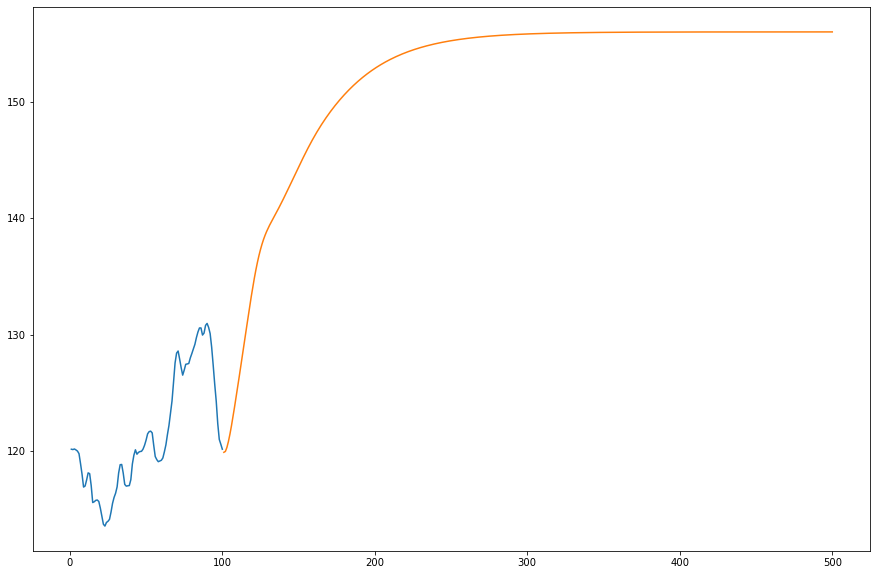

In [94]:
plt.plot(day_new,scaler.inverse_transform(df4[709:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

from sklearn.svm import SVC
model_rbf = SVC(kernel ='rbf')
model_rbf.fit(X_train, y_train)
model.score(X_test, y_test)
clf = svm.SVR(kernel='rbf')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA

def find_best_model_using_gridsearchcv(X):
    algos = {
        'SVM': {
            'model': SVR(),
            'params': {
                'kernel': ['rbf','']
            }
        },
        'ARIMA': {
            'model': ARIMA(),
            'params': {
                'order' : [(5,1,0),(7,1,1)]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)